#### 목표 : 생선 품종 분류 모델
- 데이터 : fish.csv
- 피 쳐 : Weight, Length
- 타 겟 : Species
- 기계학습 : 지도학습 + 분류( 도미, 빙어 분류는 이진분류 )

(1) 모듈 로딩 및 데이터 준비<hr>

In [71]:
import pandas as pd

In [72]:
data_file = '../data/fish.csv'

In [73]:
# DF로 데이터 준비
fishDF = pd.read_csv(data_file, header=0,usecols=[0,1,2]) # usecols = ['Species','Weight','Length']도 가능
# 기본 정보 확인
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


(2) 데이터 전처리 
- 결측치, 중복데이터, 이상치

In [74]:
# 컬럼별 고유값으로 이상치 체크
fishDF['Species'].unique(),fishDF['Length'].unique(), fishDF['Weight'].unique()

(array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
       dtype=object),
 array([25.4, 26.3, 26.5, 29. , 29.7, 30. , 30.7, 31. , 31.5, 32. , 33. ,
        33.5, 34. , 34.5, 35. , 36. , 37. , 38.5, 39.5, 41. , 14.1, 18.2,
        18.8, 19.8, 20. , 20.5, 20.8, 21. , 22. , 22.5, 24. , 23.4, 23.5,
        25.2, 26. , 27. , 31.7, 28. , 36.4, 40. , 14.7, 15.5, 17.7, 19. ,
        20.7, 21.5, 23. , 25. ,  8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7,
        19.6, 21.3, 22.7, 24.6, 25.6, 27.3, 27.5, 28.7, 32.8, 36.5, 39. ,
        42. , 43. , 43.5, 44. , 32.3, 37.3, 38. , 42.5, 45. , 46. , 48. ,
        51.7, 56. , 60. , 63.4,  9.8, 10.5, 10.6, 11. , 11.2, 11.3, 11.8,
        12. , 12.2, 12.4, 13. , 14.3]),
 array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
         475. ,  600. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,
         680. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
         925. ,  975. ,  950. ,   40. ,   69. ,   78. 

In [75]:
# 결측치 체크 => isna() / isnull()
fishDF.isna().sum()

Species    0
Weight     0
Length     0
dtype: int64

In [76]:
# 중복데이터 => duplicated()
fishDF.duplicated().sum()   # 없애고 싶으면 drop_duplicated()

4

In [77]:
# Bream, Smelt 두가지 품종만 추출
twofishDF = fishDF[fishDF['Species'].isin(['Bream','Smelt'])]

# 인덱스 리셋 : 기존의 인덱스 삭제 후 0-base 인덱스 설정
# Scikit-learn에 저장 시 ndarray 타입으로 저장되면서 인덱스 정리
twofishDF.reset_index(drop = True,inplace=True)

# 기본 정보 확인
twofishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


(3) 학습용 데이터 준비 => 피쳐 + 타겟 분리

In [78]:
# 피쳐 데이터 추출
feature = twofishDF[twofishDF.columns[1:]]
feature.head()

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0


In [79]:
# 타겟 데이터 추출
target = twofishDF['Species']
target.head()

0    Bream
1    Bream
2    Bream
3    Bream
4    Bream
Name: Species, dtype: object

In [80]:
# Bream => 0, Smelt => 1로 값 변환
target = target.replace({'Bream':0,'Smelt':1}).copy()
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

(4) 학습 진행
- 알고리즘 구현 인스턴스 생성 => 지도학습 - 분류 알고리즘 중 선택 : KNN
- 학습 진행 메서드 => fit()

In [81]:
# 모듈 로딩
from sklearn.neighbors import KNeighborsClassifier

In [82]:
# (4-1) KNN 인스턴스 생성
model = KNeighborsClassifier()  # 알고리즘 구현

model

KNeighborsClassifier()

In [83]:
# (4-2) 학습 진행 fit(2D, 1D)
model.fit(feature,target)

KNeighborsClassifier()

In [84]:
# 학습 후 속성 확인 => 속성명_ : 모델 파라미터 -> 모델 학습 후 생성 및 저장됨!
model.classes_, model.feature_names_in_, model.n_features_in_

(array([0, 1], dtype=int64), array(['Weight', 'Length'], dtype=object), 2)

(5) 학습 후 검사 즉 테스트 => score()
- 결과값 : 0.0(0%) ~ 1.0(100%)
- 사용 데이터 : 학습에 사용되지 않은 데이터

In [85]:
# 모듈 로딩
model.score(feature,target)   # 100점

1.0

(6) 예측 즉 서비스에 모델 활용 시 사용 => 메서드 : predict(), predict_proba()
- 조건 : 학습 시 전달된 데이터와 동일한 데이터가 전달

In [86]:
# [무게, 길이]
new_data = pd.DataFrame([[21.8,17]], columns=model.feature_names_in_)

# 학습 시 제공된 데이터와 같은 형태로 제공
pred_y = model.predict(new_data)
# 예측
pred_y # 1이라고 예측

array([1], dtype=int64)

In [87]:
# 예측 확률
model.predict_proba(new_data)
# 0일 확률 : 0.0 / 1일 확률 : 1.0

array([[0., 1.]])

In [110]:
# 데이터와 최근접 이웃 데이터 => kneighbors() 메서드
# 반환값 : 거리, 원소 번호
dis, ind = model.kneighbors(new_data) 
# ndarray => list
ind = ind.tolist()[0]

In [89]:
feature.index, feature.shape

(RangeIndex(start=0, stop=49, step=1), (49, 2))

- [확인] Weight & Length 시각화

In [102]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  1 non-null      float64
 1   Length  1 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 144.0 bytes


<Axes: >

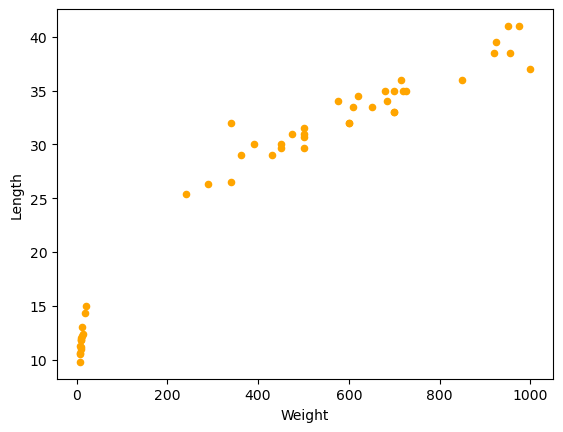

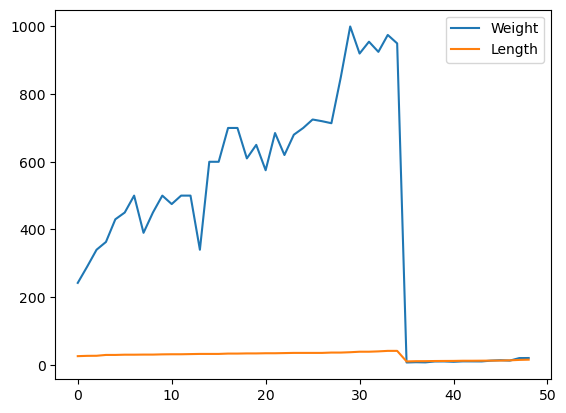

In [91]:
# pandas 의 Series와 DataFrame의 plot() 메서드
feature.plot.scatter(x='Weight', y='Length' , c = 'orange')
# feature.plot(kind = scatter, x = 'Weight', y = 'Length'
feature.plot()
# feature.plot(new_data.Weight,new_data.Length, color = 'pink')

In [92]:
# matplotlib 활용
import matplotlib.pyplot as plt

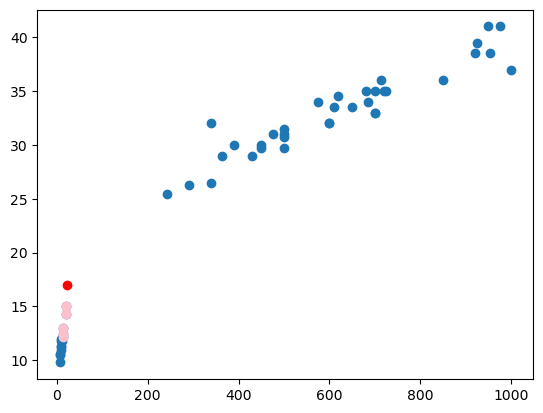

In [112]:
# 데이터 시각화
plt.scatter(twofishDF['Weight'], twofishDF['Length'])
# 새로운 데이터 시각화
plt.plot(new_data['Weight'], new_data['Length'],'ro')
# 새로운 데이터의 K개 최근접 이웃 데이터 시각화
plt.scatter(twofishDF.loc[ind,'Weight'], twofishDF.loc[ind,'Length'], color = 'pink')
plt.show()